# Conda ENV Setup

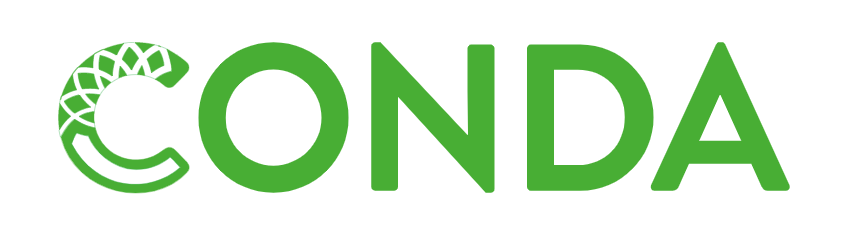

In [6]:
from IPython.display import Image
Image("./imgs/conda.png", metadata={"alt":"Anaconda log"})

I like to have my `venv` or `conda` environments as the child of my project's root directory. I don't like home directory storage. This means I use,^[No default packages is the default for `conda create`. But, explicit is better than implicit for me. The same applies to why I don't use [default packages](https://docs.conda.io/projects/conda/en/latest/user-guide/configuration/use-condarc.html#always-add-packages-by-default-create-default-packages) in my `.condarc`.] 

```bash
conda create --prefix ./.conda --no-default-packages
```

which requires a,

```
echo ".conda/" >> .gitignore
```

and activatation via,

```bash
conda activate ./.conda
```

when in that directory.^[I also *really* don't like scripts that auto-activate when you step in the directory. I've made more errors with those than without.]

For most projects, I then need,

```bash
conda install \
    numpy scipy pandas seaborn \
    networkx sympy statsmodels \
    jupyterlab dask   
```

I don't feel like doing this every time, so I keep templates in `~/Projects/templates/conda`. Basically, I create individual folders in that directory as above, then run,

```
conda env export > environment.yml
```

so that later when I need a new project, I can do,

```bash
conda env create \
    -f ~/Projects/templates/conda/datasci/environment.yml \
    --prefix ./.conda 
```

which I usually put as an `alias` in my `~/.zshrc`, 

```zsh
alias create-datasci="conda env create \
    -f ~/Projects/templates/conda/datasci/environment.yml \
    --prefix ./.conda && \
    echo ".conda/" >> .gitignore"
```

Finally, I don't like the default command line PS1 `(base)` that conda does. It ends up showing the full path which takes up too much real estate so I do,

```
conda config --set env_prompt '({name}) '
```

I'd rather be able to use the parent directory name but the `env_prompt` template is just string `format` with [three available variables](https://docs.conda.io/projects/conda/en/latest/configuration.html): prefix, default_env, and name.

See also:
    
- [Managing Environments](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html)
- [Using the .condarc conda configuration file](https://docs.conda.io/projects/conda/en/latest/user-guide/configuration/use-condarc.html)